<a href="https://colab.research.google.com/github/FerrazThales/Deteccao_de_fraudes_em_cartoes_de_credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img width="32%" src="https://github.com/FerrazThales/FerrazThales/blob/main/logo_gif.gif?raw=true">

[Thales Ferraz 👨‍💻 | Data Scientist](https://thalesferraz.medium.com/)

* ***Visite também o meu artigo sobre esta análise no [Medium](https://thalesferraz.medium.com/o-que-os-dados-nos-dizem-sobre-a-covid-19-96a2a7a984f4)***

* ***Visite mais projetos do meu portfólio no [Github do Thales Ferraz](https://bit.ly/3DQyZHu)***

* ***Vamos trocar mais idéias sobre Data Science no [LinkedIn](https://www.linkedin.com/in/thalesdefreitasferraz/)?***

---

# Detecção de Fraudes em Cartões de Crédito  -- explorar um pouco mais o texto

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://image.freepik.com/fotos-gratis/homem-hacker-no-laptop_144627-25527.jpg" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano **(????)**, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados -- explicar melhor o data set (ver o q está escrito no kaggle)

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

* o que é pca

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

## Dicionários da Base de Dados

* **Time**: *Número de segundos decorridos entre a primeira transação registrada e a transação analisada*
* falar em Vn
* **Amount** : *Quantidade de dinheiro utilizado na transação*
* **Class**: texto em itálico

In [1]:
# importar os pacotes necessários
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

#retirando warnings do código
import warnings
warnings.filterwarnings('ignore')

In [2]:
#endereco dos dados
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe
df = pd.read_csv(file_path)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

* colocar texto sobre a importãncia da análise exploratória antes de fazer os modelos de machine learning

Abordar tópicos/informações como:

* Plotar uma matriz de correlação

### Visualizando as 5 primeiras entradas

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


explicar pca novamente

### Resumo estatístico da base de dados

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


texto para explicar o describe

### Verificando se há valores ausentes

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

texto explicando que neste dataset não há valores vazios

### Avaliando o balanceamento da base de dados

In [53]:
#funcao feita para colocar o rotulo de dados
def addlabels(x,y):
  for i in range (len(y)):
    ax.text(i,y[i] + 6000,'{:,}'.format(int(y[i])).replace(',','.'),ha='center',fontsize=24,color='grey')

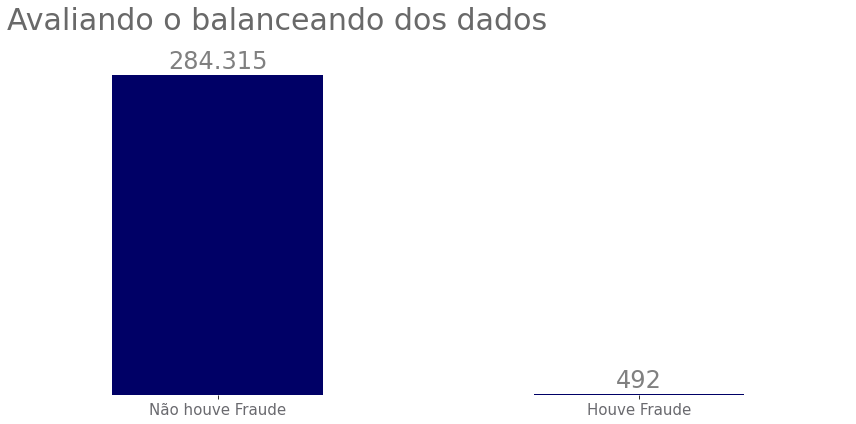

In [54]:
#criando o figure e o axes no matplotlib 
fig, ax = plt.subplots(figsize=(12,6))

#pegando a contagem de valores da variável Class
df.Class.value_counts().plot.bar(ax=ax,color='#000066')

#ajustando as configurações para exibição do gráfico
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
ax.set_title('Avaliando o balanceando dos dados',loc='left',pad=30,fontdict={'fontsize':30},color='dimgrey')
ax.tick_params(axis='x',rotation=0)
ax.set_xticklabels(['Não houve Fraude','Houve Fraude'],fontdict={'fontsize':15},color='#6a6a6f')

#colocando os rótulos de dados
addlabels(df.Class,df.Class.value_counts())


#plotando o gráfico
plt.tight_layout();

In [121]:
#avaliando quanto de fraude houve pela porcentagem
nao_fraude = df[df.Class == 1].shape[0] / df.Class.shape[0]
print('Os dados que são provenientes de fraudes representam cerca de: {:.2f}% de nossa base'.format(nao_fraude*100))

Os dados que são provenientes de fraudes representam cerca de: 0.17% de nossa base


explicando o não balanceamento dos dados

### Analisando os dados através de histogramas

#### Histograma da Variável Time

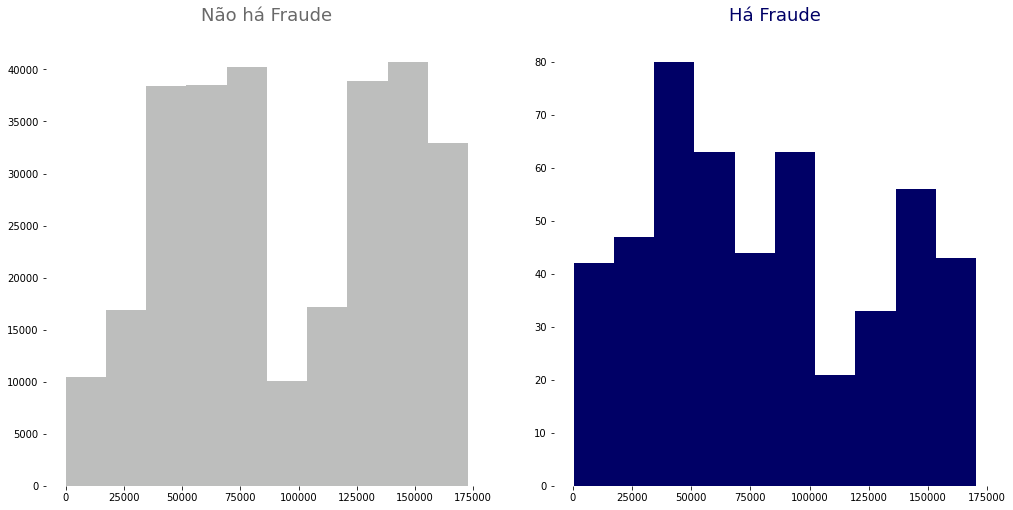

In [88]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável time quando não há fraude
ax[0].hist(df['Time'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável time quando não há fraude
ax[1].hist(df['Time'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})


#plotando o gráfico
plt.tight_layout(pad=4.0);

texto sobre este histograma

#### Histograma da Variável Amount

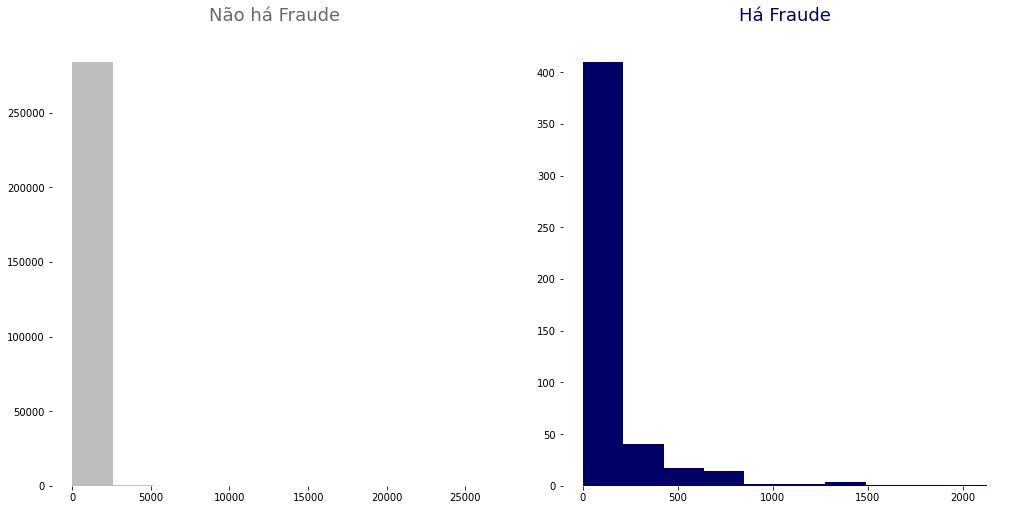

In [105]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(15,8),ncols=2)

#construindo o histograma para a variável Amount quando não há fraude
ax[0].hist(df['Amount'][df.Class == 0],color='#bdbebd')

#configurando um melhor layout
ax[0].set_frame_on(False)
ax[0].set_title('Não há Fraude',loc='center',pad=20,color='dimgrey',fontdict={'fontsize':18})

#construindo o histograma para a variável Amount quando não há fraude
ax[1].hist(df['Amount'][df.Class == 1],color='#000066')

#configurando um melhor layout
ax[1].set_frame_on(False)
ax[1].set_title('Há Fraude',loc='center',pad=20,color='#000066',fontdict={'fontsize':18})

#plotando o gráfico
plt.tight_layout(pad=4.0);

texto sobre o histograma acima

### Avaliando o boxplot da varíavel Amount

explicar o interesse apenas nos dados que se referem a fraude

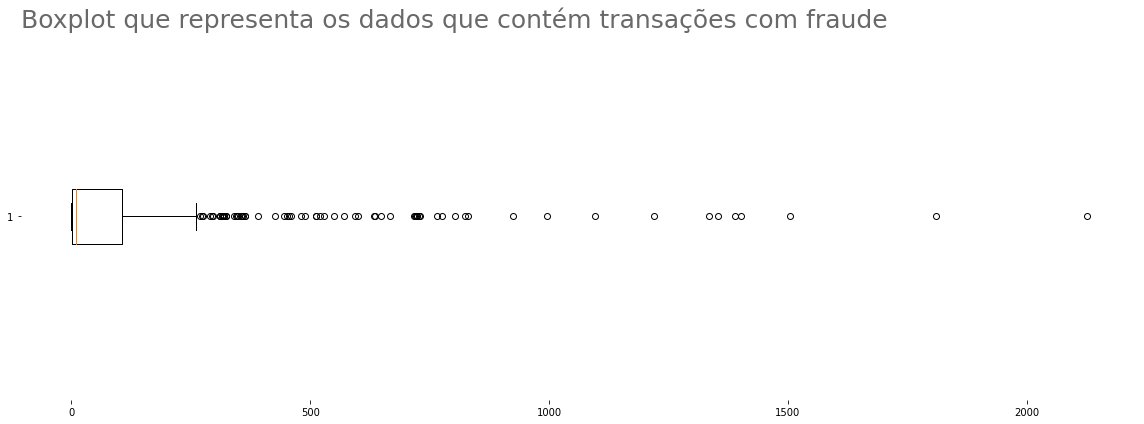

In [114]:
#criando o figure e o axes no matplotlib
fig,ax = plt.subplots(figsize=(16,6))

#criando o boxplot
ax.boxplot(df['Amount'][df.Class ==1],vert=False)

#melhorando o layout
ax.set_frame_on(False)
ax.set_title('Boxplot que representa os dados que contém transações com fraude',loc='left',color='dimgrey',fontdict={'fontsize':25})


#plotando o gráfico
plt.tight_layout();


In [127]:
#verificando os dados estatisticos
primeiro_quartil = df['Amount'].quantile(0.25)
terceiro_quartil = df['Amount'].quantile(0.75)
intervalo_interquartilico = terceiro_quartil - primeiro_quartil
maximo = terceiro_quartil + (1.5*intervalo_interquartilico)

#contabilizando a quantidade de outliers em comparação ao total de dados
porcentagem = df[df['Amount'] > maximo].shape[0] / df.shape[0]
print('Dentre os dados com fraude, aproximadamente {:.0f}% são considerados como outliers'.format(porcentagem*100))

Dentre os dados com fraude, aproximadamente 11% são considerados como outliers


texto explicando o boxplot e a quantidade de outliers

## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

## Modelos de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

## Avaliando o desempenho do modelos

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

## Conclusão

* Escrever suas conclusões a respeito da construção do modelo